<a href="https://colab.research.google.com/github/Calm-leon/proyecto-an-lisis-de-datos/blob/main/Copia_de_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos del Proyecto de Ciencia de Datos: Análisis de Pokémon Legendario.

---------------
## Contexto
---------------

Dentro del Mundo Pokémon, se considera legendario aquel Pokémon generalmente raro, con poderes sobrenaturales y que destacan sobre el resto. La mayoría de estos Pokémon forman parte del proceso de creación del Mundo y han intervenido de una u otra manera en él. Así mismo, suelen ser realmente difíciles de avistar y mucho más todavía de capturar; pues raramente se muestran ante los humanos.  

Hace un tiempo se recolectaron los datos de las estadisticas de los 802 pokemones conocidos en ese entonces.


-----------------
## Objectivo
-----------------

Analizar las habilidades con las que debe contar un Pokémon para que sea considerado legendario. 
Existen pokemones que se comparan a la fuerza de los pokemones legendarios pero ¿Por qué estos no son legendarios?.


## P 1: Importación de bibliotecas a usar.

In [ ]:
import numpy as np # Crea arreglos de grandes dimensiones y contiene funciones matemátematicas de alto nivel. 
import pandas as pd # Nos facilita la manipulación, tratamiento y análisis de los datos.
import seaborn as sns # Visualización de los datos.
import matplotlib.pyplot as plt # Trazado para graficos en dos dimenciones.
from matplotlib.ticker import PercentFormatter # Da formato de porcentajes a los graficos.
import scipy.stats as stats # Distribuciones estadisticas y .stats se utiliza para analizar la distribución normal.
%matplotlib inline 

## Respuesta 1:

- **NumPy** es una librería esencial para el análisis de datos y el cálculo científico. Hace arreglos manipulables de grandes dimensiones y contiene un gran número de funciones matemátematicas de alto nivel.
Suele importarse con el alias np de la siguiente forma: `import numpy as np`. 

- **Pandas** es la librería más utilizada para el análisis, tratamiento (leer y escribir datos en diferentes formatos) y manipulación de datos, sus estructuras básicas son marcos de datos y series. Se basa en NumPy y generalmente se importa con el alias pd como `import pandas as pd`.

- **Seaborn** es una librería que funciona como una interfaz para Matplotlib y está integrada con pandas. Se utiliza para la visualización de datos con la creación de trazados estadiaticos. Se importa normalmente con el alias sns de la siguiente forma: `import seaborn as sns`. 

- **Matplotlib** es una librería para crear diagramas matemáticos, estadísticos y científicos. La colección matplotlib.pyplot emula la forma de hacer las cosas de Matlab. Se importa con el alias plt como `import matplotlib.pyplot as plt` y el comando `%matplotlib inline` muestra los gráficos dentro del cuaderno Jupyter.

- **Scipy.stats**

In [ ]:
#Abrimos la base de datos que nos ha proporcionado el Profesor Oak.
Puchamon =  pd.read_csv("https://raw.githubusercontent.com/Calm-leon/proyecto-an-lisis-de-datos/main/Puchamon.csv")
Puchamon

,Unnamed: 0,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,797,798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,0
798,798,799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1
799,799,800,Necrozma,107,101,2.4,97,NaN,127,89,79,psychic,230.0,7,1
800,800,801,Magearna,95,115,1.0,80,NaN,130,115,65,steel,80.5,7,1


-------------------------
## Diccionaro del Conjunto de Datos según la Pokedex.
-------------------------

El conjunto de datos tiene la siguiente información: 

* pokedex_number: El número del Pokémon en la enciclopedia *Pokedex*.
* name: Nombre de la especie del Pokémon según su evolución.
* attack: Los puntos de vida que quita al dar un ataque.
* defense: Representa los puntos de vida que mantiene el Pokémon al recibir un ataque.
* height_m: Altura de la especie del Pokémon según su evolución (m).
* hp: Puntos de vida.
* percentage_male: Porcentaje que regula la probabilidad de que al nacer el Pokémon sea de género masculino.
* sp_attack: Representa la velocidad con la que el Pokémon da un ataque. 
* sp_defense: Representa la velocidad con la que el Pokémon anula los puntos de vida del ataque enemigo.
* speed: Representa la velocidad con la que el Pokémon se desplaza en combate. 
* type: Tipo de Pokémon. 
* weight_kg: Peso del Pokémon (kg). 
* generation: Cada que hay una gran ola de nuevos Pokemones la "Pokedex" es actualizada. La generación indica en qué actualización se incorpora cada Pokémon.
* is_legendary: ¿El Pokémon se considera legendario? (bit,0:no y 1:si).

## P2: ¿Qué series no son imprecindibles para determinar si un Pokémon es legendario o no?.

## Respuesta 2:

La información proporcionada en las series de *percentage_male*,*type* y *generation* no nos suministran ningún dato relevante para indagar si un Pokémon es legendario o no, teniendo en cuenta que a los Pokemones no los hace legendarios su género ni su tipo. Adicionalmente los datos de la serie *generation* tan solo nos brindan una idea del año en el que fueron avistados por primera vez los Pokemones, lo cual es irrelevante. Por lo tanto, las series mencionadas previamente fueron eliminadas de la base de datos. 

In [ ]:
Puchamon=Puchamon.drop(['percentage_male','type','generation','Unnamed: 0'],axis=1)
Puchamon

,pokedex_number,name,attack,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,1,Bulbasaur,49,49,0.7,45,65,65,45,6.9,0
1,2,Ivysaur,62,63,1.0,60,80,80,60,13.0,0
2,3,Venusaur,100,123,2.0,80,122,120,80,100.0,0
3,4,Charmander,52,43,0.6,39,60,50,65,8.5,0
4,5,Charmeleon,64,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,181,131,0.3,59,59,31,109,0.1,0
798,799,Guzzlord,101,53,5.5,223,97,53,43,888.0,1
799,800,Necrozma,107,101,2.4,97,127,89,79,230.0,1
800,801,Magearna,95,115,1.0,80,130,115,65,80.5,1


-----------------
## Limpieza del Conjunto de Datos.
-----------------


In [ ]:
Puchamon3=Puchamon.drop(['attack','defense','height_m','hp','sp_attack','sp_defense','speed','weight_kg','is_legendary'],axis=1) 
Puchamon = pd.concat([Puchamon3,Puchamon.hp,Puchamon.attack,Puchamon.defense,Puchamon.height_m,Puchamon.weight_kg,Puchamon.speed,Puchamon.sp_attack,Puchamon.sp_defense,Puchamon.is_legendary], axis=1)
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


-----------------
## P3. ¿Qué factores afectan en mayor proporción las habilidades de los Pokemones?
-----------------


## Respuesta 3.

Se asume que entre más alto y pesado sea un Pokémon, más ralentizará su movimiento. El tamaño y peso de los Pokemones legendarios es muy diverso, luego se debe disminuir la brecha que existe en las estadísticas referentes a la velocidad de los Pokemones pequeños y los Pokemones grandes. Para lograr esto se sumo la altura y el peso de cada Pokémon, y se dividió por diez, a lo que se denomino friccion. Los Pokemones grandes tendrán una fricción alta, por consiguiente al sumar los datos dados en la serie *friccion* con las correspondientes velocidades se disminuira la brecha mencionada previamente.

In [ ]:
Puchamon2=Puchamon.drop(['is_legendary'],axis=1)                             # quitamos la última columna para comodidad al unir una nueva columna
Friccion = (Puchamon.height_m + Puchamon.weight_kg)/10                       # hacemos una lista que suma la altura y el peso y lo divide por 10
Friccion = pd.DataFrame(Friccion, columns = ['Friccion'])                    # lo hacemos un dataframe
Puchamon2=pd.concat([Puchamon2,Friccion], axis=1)                            # unimos el nuevo dataframe

# Sumaremos la friccion a las velocidades de cada pokemon. 
sp_attack_D  = (Puchamon2.sp_attack + Puchamon2.Friccion)
sp_defense_D = (Puchamon2.sp_defense +  Puchamon2.Friccion)
speed_D      = (Puchamon2.speed +  Puchamon2.Friccion)                       # hemos sumado las velocidades con lo que llamamos friccion

sp_attack_D  = pd.DataFrame(sp_attack_D, columns = ['sp_attack_D'])
sp_defense_D = pd.DataFrame(sp_defense_D, columns = ['sp_defense_D'])
speed_D      = pd.DataFrame(speed_D, columns = ['speed_D'])                  # los hicimos dataframes

Puchamon2 = pd.concat([Puchamon2,speed_D,sp_attack_D,sp_defense_D], axis=1)  # unimos todo en nuestro dataframe

Puchamon=pd.concat([Puchamon2,Puchamon.is_legendary], axis=1)                # por ultimo unimos la columna que quitamos por comodidad
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,Friccion,speed_D,sp_attack_D,sp_defense_D,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0.76,45.76,65.76,65.76,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,1.40,61.40,81.40,81.40,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,10.20,90.20,132.20,130.20,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0.91,65.91,60.91,50.91,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,2.01,82.01,82.01,67.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0.04,109.04,59.04,31.04,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,89.35,132.35,186.35,142.35,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,23.24,102.24,150.24,112.24,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,8.15,73.15,138.15,123.15,1


Al haber incorporado nuevas series a partir de *height_m*, *weight_kg*, *Friccion*, *speed*, *sp_attack* y *sp_defense*, es poco productivo analizar estas series junto a las que se adicionaron, puesto que la correlación con las nuevas variables sería alta, y no aportaria información relevante. Por lo tanto, se descartarán sin ser eliminadas, las series que ya se tenían incialmente en el Conjunto de Datos.





In [ ]:
Puchamon_Reserva= pd.concat([Puchamon.height_m,Puchamon.weight_kg,Puchamon.speed,Puchamon.sp_attack,Puchamon.sp_defense], axis=1) 
Puchamon=Puchamon.drop(['height_m','sp_attack','sp_defense','speed','weight_kg'],axis=1) 
Puchamon

,pokedex_number,name,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,is_legendary
0,1,Bulbasaur,45,49,49,0.76,45.76,65.76,65.76,0
1,2,Ivysaur,60,62,63,1.40,61.40,81.40,81.40,0
2,3,Venusaur,80,100,123,10.20,90.20,132.20,130.20,0
3,4,Charmander,39,52,43,0.91,65.91,60.91,50.91,0
4,5,Charmeleon,58,64,58,2.01,82.01,82.01,67.01,0
...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.04,109.04,59.04,31.04,0
798,799,Guzzlord,223,101,53,89.35,132.35,186.35,142.35,1
799,800,Necrozma,97,107,101,23.24,102.24,150.24,112.24,1
800,801,Magearna,80,95,115,8.15,73.15,138.15,123.15,1


---------------
## El Poder Puchamon.
---------------
En el análisis del Conjunto de Datos se dedujo una nueva variable la cual se denominó `PoderPuchamon`, y es la que indica el poder de cada Pokémon. Para establecer esta nueva variable, se consideró el grado de relevancia (dándole un peso de 1 a 5) de cada una de las habilidades de los Pokemones. La vida, el ataque y la defensa serían las características más importantes en un combate, luego tendrán un peso de "5". Por otro lado, las velocidades del Pokémon no son tan relevantes como lo anterior, pero entre ellas destaca la velocidad general, puesto que si el Pokémon al moverse es lento su oponente fácilmente podrá prepararse para el golpe, luego la velocidad tendrá un peso de "4". Por último, tanto la velocidad de ataque como la velocidad de defensa son importantes en un lapso muy corto de tiempo, es decir, se tienen en consideración justo en el momento del impacto, entonces debe ocurrir la situación de dar o recibir un golpe directo, lo cual es inmediatamente después de que su velocidad general no haya sido suficiente para esquivar o dar el golpe, por lo tanto, tendrán un peso menor igual a "3".
La suma de estos pesos nos da como resultado "25", por consiguiente al multiplicar cada estadística del Pokémon por su peso y luego sumarlas, se debe dividir por 25, obteniendo su poder general.

In [ ]:
PoderPuchamon = (Puchamon.hp*5 + Puchamon.attack*5 + Puchamon.defense*5 + Puchamon.speed_D*4 + Puchamon.sp_attack_D*3 + Puchamon.sp_defense_D*3 )/25
PoderPuchamon = pd.DataFrame(PoderPuchamon, columns = ['PoderPuchamon']) #Lo hacemos una lista con los resultado
Puchamon2=Puchamon.drop(['is_legendary'],axis=1)                         #Por comodidad quitamos la ultima columna
Puchamon2=pd.concat([Puchamon2,PoderPuchamon], axis=1)                   #añadimos la columna nueva
Puchamon=pd.concat([Puchamon2,Puchamon.is_legendary], axis=1)            #añadimos la ultima columna
Puchamon

,pokedex_number,name,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon,is_legendary
0,1,Bulbasaur,45,49,49,0.76,45.76,65.76,65.76,51.704,0
1,2,Ivysaur,60,62,63,1.40,61.40,81.40,81.40,66.360,0
2,3,Venusaur,80,100,123,10.20,90.20,132.20,130.20,106.520,0
3,4,Charmander,39,52,43,0.91,65.91,60.91,50.91,50.764,0
4,5,Charmeleon,58,64,58,2.01,82.01,82.01,67.01,67.004,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.04,109.04,59.04,31.04,102.456,0
798,799,Guzzlord,223,101,53,89.35,132.35,186.35,142.35,136.020,1
799,800,Necrozma,97,107,101,23.24,102.24,150.24,112.24,108.856,1
800,801,Magearna,80,95,115,8.15,73.15,138.15,123.15,101.060,1


Una vez realizada la limpieza de los datos, se dará nuevamente el diccionario del Conjunto de Datos resultante para el análisis.

-------------------------
## Diccionaro de Conjunto de Datos
-------------------------

El conjunto de datos tiene la siguiente información: 

* pokedex_number: El número del pokemon en la enciclopedia "Pokedex".
* name: Nombre del Pokemon.
* hp: Puntos de vida.
* attack: Los puntos de vida que quita al dar un ataque.
* defense: Representa los puntos de vida que evita que le quiten al recivir un ataque.
* Fricción: La realentizacion que tiene un pokemon por su altura y peso.
* speed: Velocidad con la que se mueve en combate sin importar su tamaño ni peso. 
* sp_attack_D: Velocidad con la que da un ataque sin importar su tamaño ni peso. 
* sp_defense: Velocidad con la que anula los puntos de vida del ataque enemigo sin importar su tamaño ni peso.
* is_legendary: ¿El Pokémon se considera legendario? (bit,0:no y 1:si).

In [ ]:
# Información del la base de datos Puchamon
Puchamon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  802 non-null    int64  
 1   name            802 non-null    object 
 2   hp              802 non-null    int64  
 3   attack          802 non-null    int64  
 4   defense         802 non-null    int64  
 5   Friccion        802 non-null    float64
 6   speed_D         802 non-null    float64
 7   sp_attack_D     802 non-null    float64
 8   sp_defense_D    802 non-null    float64
 9   PoderPuchamon   802 non-null    float64
 10  is_legendary    802 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 69.0+ KB


In [ ]:
# Base final a tranajar
Puchamon

,pokedex_number,name,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon,is_legendary
0,1,Bulbasaur,45,49,49,0.76,45.76,65.76,65.76,51.704,0
1,2,Ivysaur,60,62,63,1.40,61.40,81.40,81.40,66.360,0
2,3,Venusaur,80,100,123,10.20,90.20,132.20,130.20,106.520,0
3,4,Charmander,39,52,43,0.91,65.91,60.91,50.91,50.764,0
4,5,Charmeleon,58,64,58,2.01,82.01,82.01,67.01,67.004,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.04,109.04,59.04,31.04,102.456,0
798,799,Guzzlord,223,101,53,89.35,132.35,186.35,142.35,136.020,1
799,800,Necrozma,97,107,101,23.24,102.24,150.24,112.24,108.856,1
800,801,Magearna,80,95,115,8.15,73.15,138.15,123.15,101.060,1


----------------------
# Análisis Descriptivo de Pokemones Legendarios
----------------------

In [ ]:
# Base de datos 
Filtronormales =  Puchamon['is_legendary'] == 1
Legendarios= Puchamon[Filtronormales]
Legendarios

,pokedex_number,name,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon,is_legendary
143,144,Articuno,90,85,100,5.71,90.71,100.71,130.71,97.284,1
144,145,Zapdos,90,90,85,5.42,105.42,130.42,95.42,96.968,1
145,146,Moltres,90,100,90,6.20,96.20,131.20,91.20,98.080,1
149,150,Mewtwo,106,150,70,12.40,152.40,206.40,132.40,130.240,1
150,151,Mew,100,100,100,0.44,100.44,100.44,100.44,100.176,1
242,243,Raikou,90,85,75,17.99,132.99,132.99,117.99,101.396,1
243,244,Entei,115,115,85,20.01,120.01,110.01,95.01,106.804,1
244,245,Suicune,100,75,115,18.90,103.90,108.90,133.90,103.760,1
248,249,Lugia,106,90,130,22.12,132.12,112.12,176.12,120.928,1
249,250,Ho-Oh,106,130,90,20.28,110.28,130.28,174.28,119.392,1


En primer lugar, analizaremos las variables con el método `.describe` que nos arroja un objeto tipo dataframe donde las columnas son las variables del dataframe inicial y las filas corresponden al número total de los datos; la media; la desviación estándar; el mínimo dato; el primer, segundo y tercer cuartil y por último el máximo dato.

In [244]:
T =Legendarios.iloc[:,1:10].describe()

ModaLegendarios=Legendarios.mode(axis=0,numeric_only= True)
MdLegendarios=ModaLegendarios.head(1)
MdLegendarios = MdLegendarios.drop(['pokedex_number','is_legendary'],axis=1)
MdLegendarios
T= T.append(MdLegendarios,ignore_index= True)
T.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda'},inplace= True)
T

var=Legendarios.var()              #varianza
var=pd.DataFrame(var, columns = ['nombre'])  
var = var.drop(['pokedex_number','is_legendary'],axis=0)
var

,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,97.403509,109.421053,99.719298,21.416667,114.065789,137.118421,127.714912,111.339298
std,31.870194,32.596531,28.559933,23.667941,26.968384,41.283790,37.326069,19.456491
min,43.000000,29.000000,31.000000,0.030000,37.030000,29.030000,31.030000,33.732000
25%,80.000000,90.000000,85.000000,5.420000,96.980000,110.010000,105.060000,98.080000
50%,91.000000,107.000000,100.000000,18.900000,115.060000,131.980000,123.960000,108.804000
75%,106.000000,130.000000,115.000000,26.190000,132.230000,154.790000,149.200000,124.008000
max,223.000000,180.000000,200.000000,100.000000,185.350000,245.350000,231.000000,169.340000
Moda,80.000000,100.000000,100.000000,0.060000,37.030000,29.030000,31.030000,95.824000


## Diagramas de caja y dencidad para cada una de las variables de la base Legendarios

### Variable `hp`

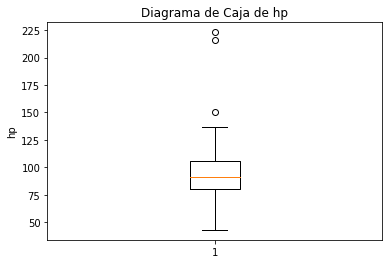

In [ ]:
# Diagrama de caja
plt.boxplot(Legendarios['hp'])

plt.title('Diagrama de Caja de hp')
plt.ylabel('hp')
plt.show()

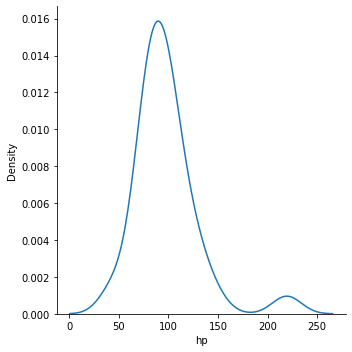

In [ ]:
# Diagrama de densidad
sns.displot(Legendarios['hp'], kind='kde')
plt.show()

#### Distribución de Frecuencias

In [246]:
# Calculamos frecuencia absoluta
frec = pd.value_counts(Legendarios['hp'])

# Guardamos la información en un dataframe
frec_df = pd.DataFrame(frec)

# Asignamos el nombre Frec_abs a la columna
frec_df.columns = ['Frec_abs']

# Calculamos frecuencia relativa en porcentaje
frec_df['Frec_rel_%']=100*frec_df['Frec_abs']/len(Legendarios)

# Calculamos la frecuencia relativa en porcentaje acumulada
# Obtenemos los valores de las Frecuencias Absolutas
Frec_rel_val = frec_df['Frec_rel_%'].values

# Creamos una lista vacia en donde registraremos las frecuecnias absolutas acumuladas
acum = []

# Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

# Recorremos la lista de las frecuencias absolutas para irlas sumando
for i in Frec_rel_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

frec_df['Frec_rel_%_acum'] = acum
frec_df

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
80,9,15.789474,15.789474
100,8,14.035088,29.824561
90,5,8.771930,38.596491
91,4,7.017544,45.614035
70,4,7.017544,52.631579
106,3,5.263158,57.894737
75,2,3.508772,61.403509
137,2,3.508772,64.912281
120,2,3.508772,68.421053
79,2,3.508772,71.929825


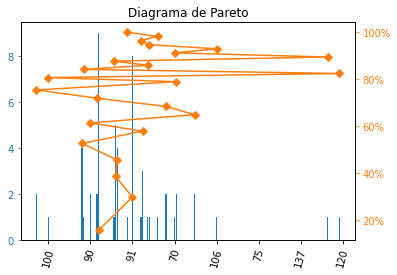

In [248]:
# Indicamos que solo utilizaremos un gráfico
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Le asignamos un título al gráfico
ax.set_title('Diagrama de Pareto')

# Creamos una gráfica de barras con las frecuencias absolutas
ax.bar(frec_df.index, frec_df['Frec_abs'], color = 'C0')

# Graficamos los valores de la frecuencia relativa acumulada
ax2 = ax.twinx() # Le indicamos que este será nuestro eje a graficar
ax2.plot(frec_df.index, frec_df['Frec_rel_%_acum'], color='C1', marker='D', ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Assignamos un color para las etiquetas de los ejes "y"
ax.tick_params(axis = 'y', colors = 'C0')
ax2.tick_params(axis = 'y', colors = 'C1')

#Rotamos las etiquetas del eje de las x's
ax.set_xticklabels(frec_df.index, rotation = 75)

plt.show()

#### Medidas de tendencia central

- Moda:
- Mediana:
- Media:

#### Medidas de Dispersión

- Varianza:
- Desviación estandar:
- Rango intercualtil:

### Variable `attack`

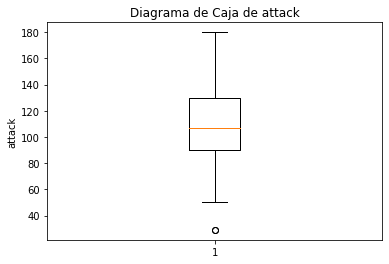

In [ ]:
plt.boxplot(Legendarios['attack'])

plt.title('Diagrama de Caja de attack')
plt.ylabel('attack')
plt.show()

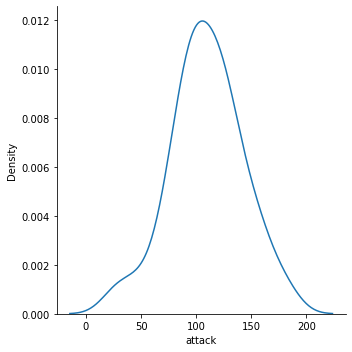

In [ ]:
sns.displot(Legendarios['attack'], kind='kde')
plt.show()

### Variable `defense`

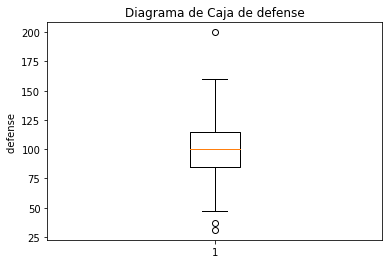

In [ ]:
plt.boxplot(Legendarios['defense'])

plt.title('Diagrama de Caja de defense')
plt.ylabel('defense ')
plt.show()

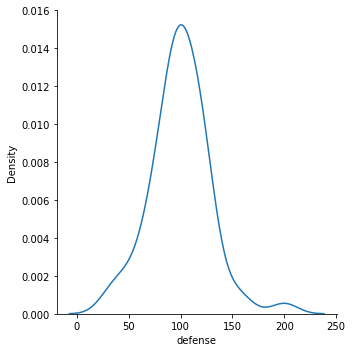

In [ ]:
sns.displot(Legendarios['defense'], kind='kde')
plt.show()

### Variable `Friccion`

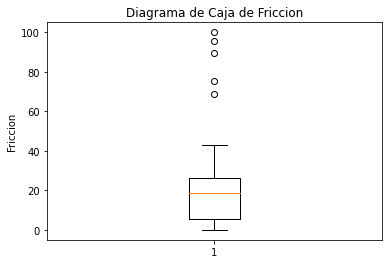

In [ ]:
plt.boxplot(Legendarios['Friccion'])

plt.title('Diagrama de Caja de Friccion')
plt.ylabel('Friccion')
plt.show()

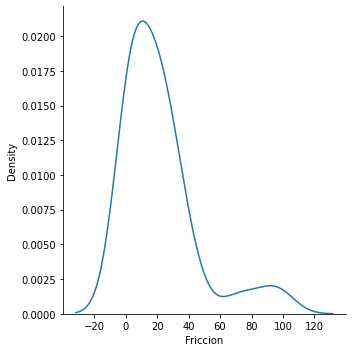

In [ ]:
sns.displot(Legendarios['Friccion'], kind='kde')
plt.show()

### Variable `speed_D`

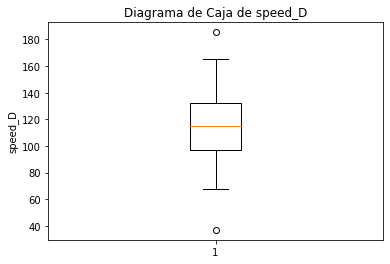

In [ ]:
plt.boxplot(Legendarios['speed_D'])

plt.title('Diagrama de Caja de speed_D')
plt.ylabel('speed_D')
plt.show()

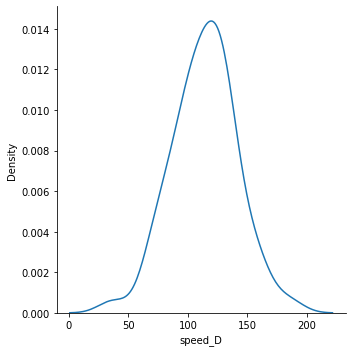

In [ ]:
sns.displot(Legendarios['speed_D'], kind='kde')
plt.show()

### Variable `sp_attack_D`

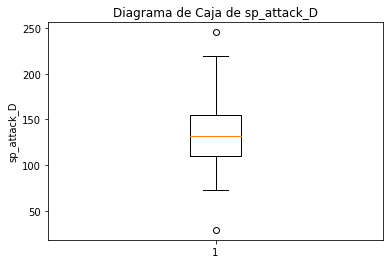

In [ ]:
plt.boxplot(Legendarios['sp_attack_D'])

plt.title('Diagrama de Caja de sp_attack_D')
plt.ylabel('sp_attack_D')
plt.show()

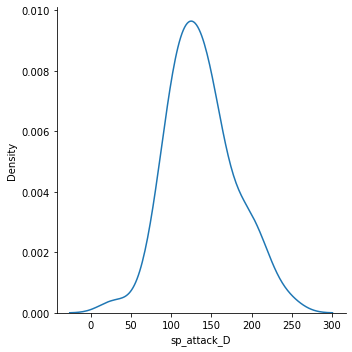

In [ ]:
sns.displot(Legendarios['sp_attack_D'], kind='kde')
plt.show()

### Variable `sp_defense_D`

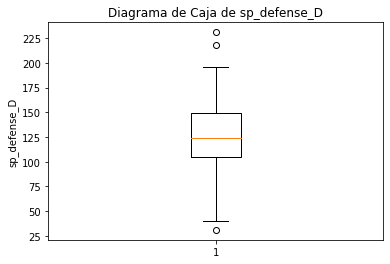

In [ ]:
plt.boxplot(Legendarios['sp_defense_D'])

plt.title('Diagrama de Caja de sp_defense_D')
plt.ylabel('sp_defense_D')
plt.show()

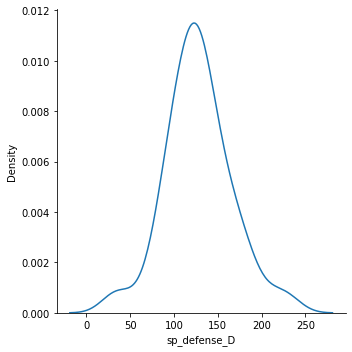

In [ ]:
sns.displot(Legendarios['sp_defense_D'], kind='kde')
plt.show()

### Variable `PoderPuchamon`

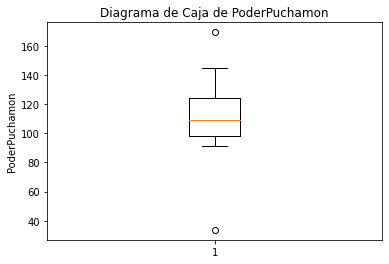

In [ ]:
plt.boxplot(Legendarios['PoderPuchamon'])

plt.title('Diagrama de Caja de PoderPuchamon')
plt.ylabel('PoderPuchamon')
plt.show()

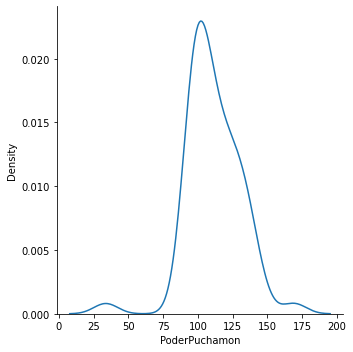

In [ ]:
sns.displot(Legendarios['PoderPuchamon'], kind='kde')
plt.show()

## Matriz de correlación de la base Legendarios

In [ ]:
# Creación de la Matiz
corr_matrix = Legendarios.iloc[:,1:10].corr()
corr_matrix

,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon
hp,1.000000,0.179805,-0.035893,0.384825,0.329378,0.306420,0.163614,0.566050
attack,0.179805,1.000000,0.026178,0.099324,0.483799,0.589165,-0.063844,0.644272
defense,-0.035893,0.026178,1.000000,0.284506,0.006235,-0.038018,0.440458,0.383691
Friccion,0.384825,0.099324,0.284506,1.000000,0.596618,0.535817,0.622056,0.654826
speed_D,0.329378,0.483799,0.006235,0.596618,1.000000,0.652237,0.276904,0.723438
sp_attack_D,0.306420,0.589165,-0.038018,0.535817,0.652237,1.000000,0.397787,0.777483
sp_defense_D,0.163614,-0.063844,0.440458,0.622056,0.276904,0.397787,1.000000,0.554425
PoderPuchamon,0.566050,0.644272,0.383691,0.654826,0.723438,0.777483,0.554425,1.000000


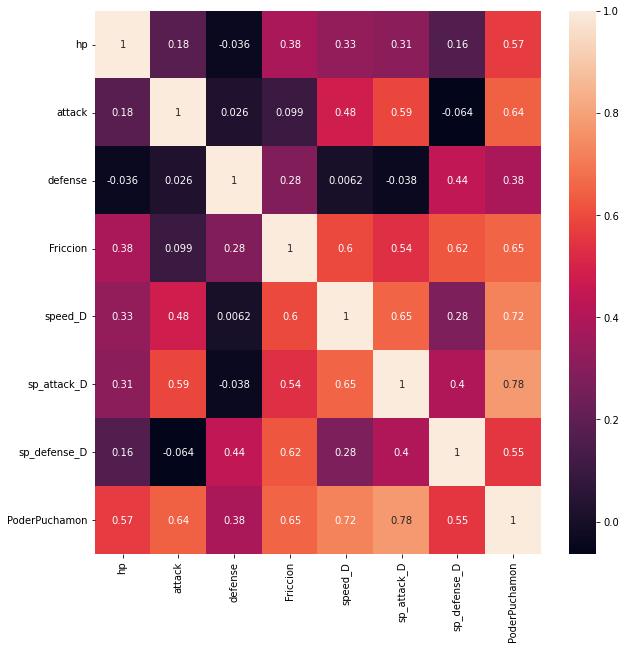

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True)
# Visualización de la matriz
plt.show()

----------------------
# Análisis Pokemones No Legendarios
----------------------

In [ ]:
# Base de datos
FiltroLegendario =  Puchamon['is_legendary'] == 0
Pokemones= Puchamon[FiltroLegendario]
Pokemones

,pokedex_number,name,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon,is_legendary
0,1,Bulbasaur,45,49,49,0.76,45.76,65.76,65.76,51.704,0
1,2,Ivysaur,60,62,63,1.40,61.40,81.40,81.40,66.360,0
2,3,Venusaur,80,100,123,10.20,90.20,132.20,130.20,106.520,0
3,4,Charmander,39,52,43,0.91,65.91,60.91,50.91,50.764,0
4,5,Charmeleon,58,64,58,2.01,82.01,82.01,67.01,67.004,0
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Kommo-o,75,110,125,7.98,92.98,107.98,112.98,103.392,0
793,794,Buzzwole,107,139,139,33.60,112.60,86.60,86.60,115.800,0
795,796,Xurkitree,83,89,71,10.38,93.38,183.38,81.38,95.312,0
796,797,Celesteela,97,101,103,100.91,161.91,207.91,201.91,135.284,0


Continuemos nuestro análisis de las variables de la base de datos `Pokemones` con el método `.describe` que nos arroja un objeto tipo dataframe.

In [ ]:
Pokemones.iloc[:,1:10].describe()

,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,66.824161,75.472483,71.001342,4.994362,69.360805,72.942013,73.237315,71.298846
std,24.854360,30.833312,29.981513,8.137009,29.364365,31.881268,29.151868,19.745480
min,1.000000,5.000000,5.000000,0.020000,5.150000,10.800000,20.130000,30.084000
25%,50.000000,53.000000,50.000000,0.900000,46.300000,48.440000,51.300000,54.016000
50%,65.000000,71.000000,65.000000,2.570000,66.260000,67.410000,69.110000,72.616000
75%,79.000000,95.000000,86.000000,5.690000,89.300000,93.500000,90.630000,85.912000
max,255.000000,185.000000,230.000000,100.910000,186.250000,207.910000,232.110000,140.464000


## Diagramas de caja y dencidad para cada una de las variables de la base Pokemones

### Variable `hp`

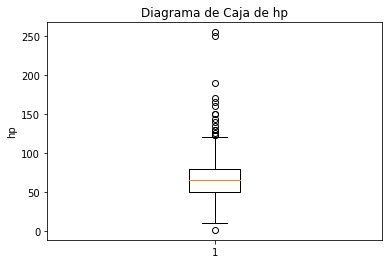

In [ ]:
plt.boxplot(Pokemones['hp'])

plt.title('Diagrama de Caja de hp')
plt.ylabel('hp')
plt.show()

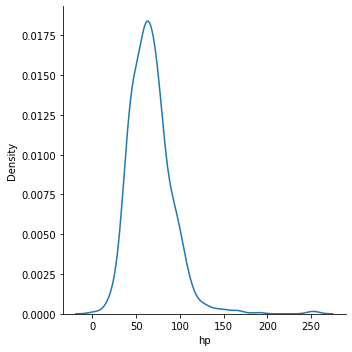

In [ ]:
sns.displot(Pokemones['hp'], kind='kde')
plt.show()

### Variable `attack`

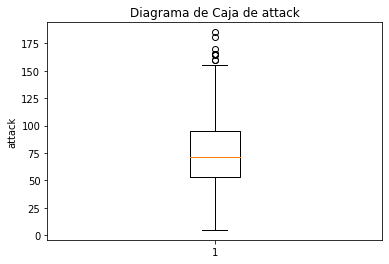

In [ ]:
plt.boxplot(Pokemones['attack'])

plt.title('Diagrama de Caja de attack')
plt.ylabel('attack')
plt.show()

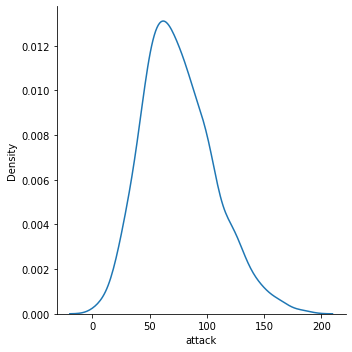

In [ ]:
sns.displot(Pokemones['attack'], kind='kde')
plt.show()

### Variable `defense`

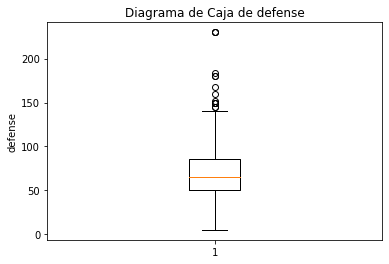

In [ ]:
plt.boxplot(Pokemones['defense'])

plt.title('Diagrama de Caja de defense')
plt.ylabel('defense')
plt.show()

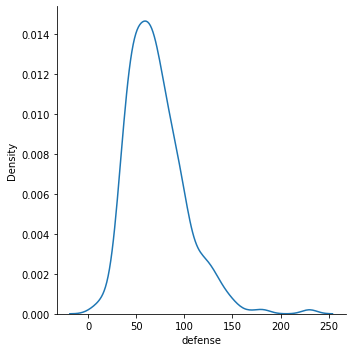

In [ ]:
sns.displot(Pokemones['defense'], kind='kde')
plt.show()

### Variable `Friccion`

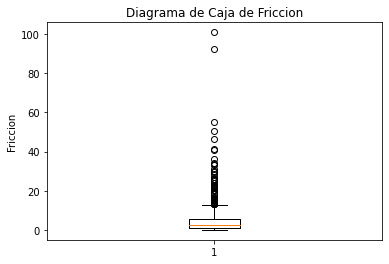

In [ ]:
plt.boxplot(Pokemones['Friccion'])

plt.title('Diagrama de Caja de Friccion')
plt.ylabel('Friccion')
plt.show()

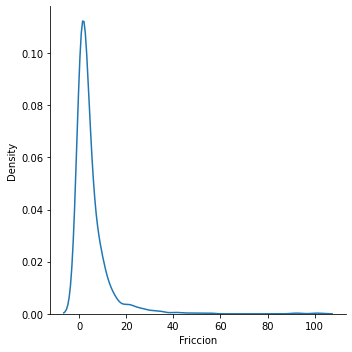

In [ ]:
sns.displot(Pokemones['Friccion'], kind='kde')
plt.show()

### Variable `speed_D`

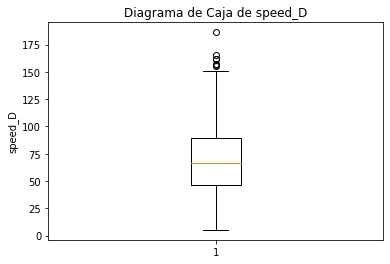

In [ ]:
plt.boxplot(Pokemones['speed_D'])

plt.title('Diagrama de Caja de speed_D')
plt.ylabel('speed_D')
plt.show()

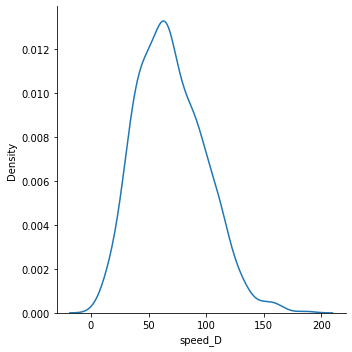

In [ ]:
sns.displot(Pokemones['speed_D'], kind='kde')
plt.show()

### Variable `sp_attack_D`

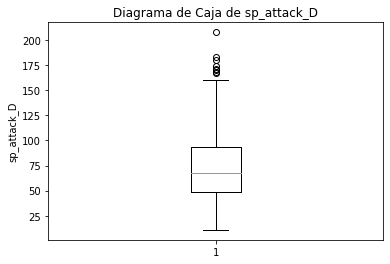

In [ ]:
plt.boxplot(Pokemones['sp_attack_D'])

plt.title('Diagrama de Caja de sp_attack_D')
plt.ylabel('sp_attack_D')
plt.show()

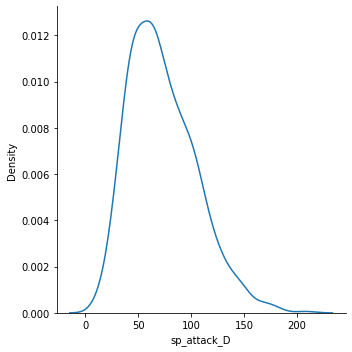

In [ ]:
sns.displot(Pokemones['sp_attack_D'], kind='kde')
plt.show()

### Variable `sp_defense_D`

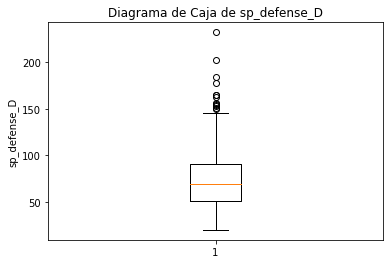

In [ ]:
plt.boxplot(Pokemones['sp_defense_D'])

plt.title('Diagrama de Caja de sp_defense_D')
plt.ylabel('sp_defense_D')
plt.show()

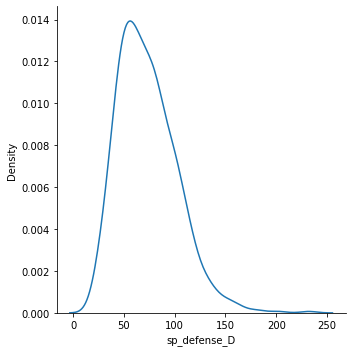

In [ ]:
sns.displot(Pokemones['sp_defense_D'], kind='kde')
plt.show()

### Variable `PoderPuchamon`

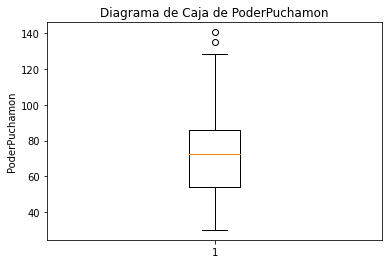

In [ ]:
plt.boxplot(Pokemones['PoderPuchamon'])

plt.title('Diagrama de Caja de PoderPuchamon')
plt.ylabel('PoderPuchamon')
plt.show()

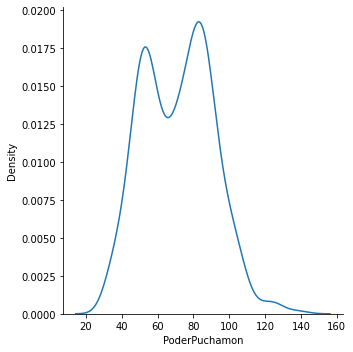

In [ ]:
sns.displot(Pokemones['PoderPuchamon'], kind='kde')
plt.show()

## Matriz de correlación de la base Pokemones

In [ ]:
# Creación de la Matiz
corr_matrix = Pokemones.iloc[:,1:10].corr()
corr_matrix

,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon
hp,1.000000,0.378852,0.206935,0.370741,0.203020,0.381269,0.405210,0.626876
attack,0.378852,1.000000,0.463529,0.384500,0.392596,0.345794,0.304682,0.762840
defense,0.206935,0.463529,1.000000,0.422262,0.077390,0.296304,0.562946,0.676097
Friccion,0.370741,0.384500,0.422262,1.000000,0.261388,0.404542,0.511624,0.572867
speed_D,0.203020,0.392596,0.077390,0.261388,1.000000,0.447658,0.286765,0.572705
sp_attack_D,0.381269,0.345794,0.296304,0.404542,0.447658,1.000000,0.561195,0.693654
sp_defense_D,0.405210,0.304682,0.562946,0.511624,0.286765,0.561195,1.000000,0.722253
PoderPuchamon,0.626876,0.762840,0.676097,0.572867,0.572705,0.693654,0.722253,1.000000


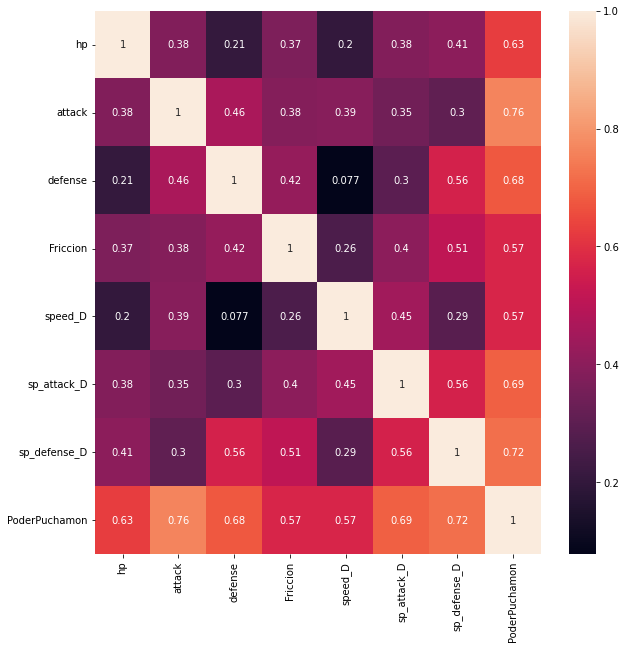

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True)
# Visualización de la matriz
plt.show()